In [95]:
import numpy as np
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Build K-Nearest Neighbor algorithm usin Numpy:

- It's a special non-parametric, lazy, and superivesd algorithm.
- **non-parametric:** has no specific function that guard the algorithm, so human can't understand what happend at each step in detailes.
- **lazy:** the model won't learn from the data, but it memorized it, then at predict time compare the new data by the memorized data.
- It mesure the distence between the new point and its 'k' (amount) of nighbor points to classify the new one based on the majority vote.
- Example: 5 nighbors to new point, 4 of them is cat, 1 of them is dog, the majority is cat, so we classify the new point as cat.

## We want to create KNN model to recommend the best documentary classification

In [109]:
# the data (random data):
x = np.array([
    [5,0], [4,6], [3,2], [9,1] ,[1,9], [1,4], [8,1], [4,2]
    ])

# meaning: 1: equal to 5 -> documentary about animals, 0: equal to 10 -> documentary about factories:
y = np.array([1, 0, 1, 0, 0, 1, 0, 1])


In [110]:
class Knn:

    def __init__(self, k):
        self.__k = k

    def fit(self, x_train,y_train):
        self._x_train = x_train
        self._y_train = y_train

    def __distence(self, x_test):
        
        x_test.reshape(1,2) # like x_train shape

        self.distence = np.sqrt(np.sum((x_test - self._x_train)**2, axis=1))
        return self.distence

    def predict(self, x_test):
        d = self.__distence(x_test)
        labels = []
        
        for i in range(self.__k):
            index = np.argmin(d)
            labels.append(self._y_train[index])
            d = np.delete(d, index)
        count_labels = Counter(labels)
        pred_label = -1
        
        most_common = count_labels.most_common(1)
        pred_label = most_common[0][0]

        return pred_label
        

        
        

In [111]:
# create object:
model = Knn(3)

In [112]:
# train the model (in real, it'll memorize them):
model.fit(x,y)

In [113]:
# predict:
test = np.array([3,2])
predicted_class = model.predict(test)
print(f'The predicted label for {test} point is: {predicted_class}')

The predicted label for [3 2] point is: 1


## visualize the results:

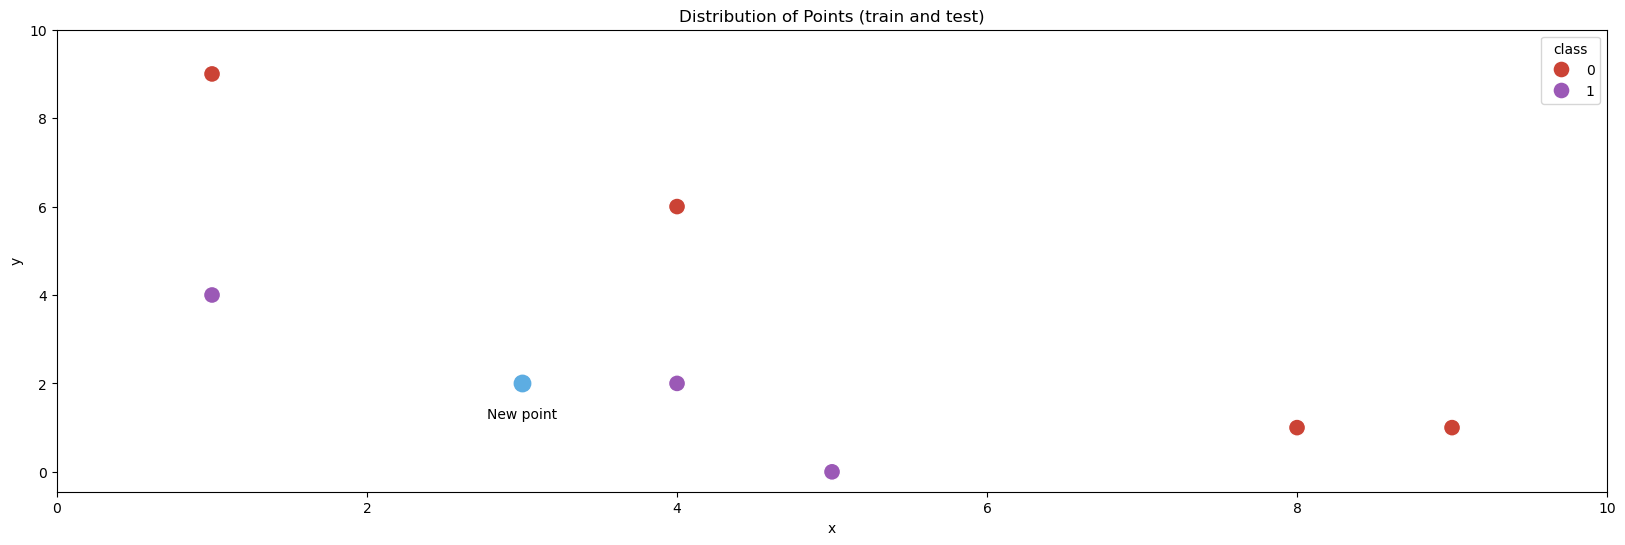

In [115]:

df = pd.DataFrame({'x1' : x[:,0], 'x2' : x[:,1], 'class' : y})

plt.figure(figsize=(20,6))
sn.scatterplot(data=df, x='x1', y='x2', hue='class', palette=['#cb4335', '#9b59b6'],markers='o', s=150)
plt.scatter(x =test[0], y=test[1], c='#5dade2',marker='o', s=140)

plt.text(test[0], (test[1] - 0.8), 'New point', fontsize=10, ha='center')
plt.title('Distribution of Points (train and test)')
plt.xlabel('x')
plt.ylabel('y')

plt.xticks(np.arange(0,11,2))
plt.yticks(np.arange(0,11,2))

plt.show()

**Insights:**<br>
We see that the new point is nearest to points that their class is 1.